# Примеры из лабораторной работы

## Создание Series из списка Python

In [8]:
import pandas as pd
s1 = pd.Series([1, 2, 3, 4, 5])
print(s1)

0    1
1    2
2    3
3    4
4    5
dtype: int64


In [10]:
s2 = pd.Series([1, 2, 3, 4, 5], ['a', 'b', 'c', 'd', 'e'])
print(s2)

a    1
b    2
c    3
d    4
e    5
dtype: int64


## Создание Series из ndarray массива из NumPy

In [13]:
import numpy as np
ndarr = np.array([1, 2, 3, 4, 5])
type(ndarr)

numpy.ndarray

In [15]:
s3 = pd.Series(ndarr, ['a', 'b', 'c', 'd', 'e'])
print(s3)

a    1
b    2
c    3
d    4
e    5
dtype: int32


## Создание Series из словаря

In [18]:
d = {'a':1, 'b':2, 'c':3}
s4 = pd.Series(d)
print(s4)

a    1
b    2
c    3
dtype: int64


## Создание Series с использование константы

In [21]:
a = 7
s5 = pd.Series(a, ['a', 'b', 'c'])
print(s5)

a    7
b    7
c    7
dtype: int64


# Работа с элементами Series

In [26]:
s6['d']

4

In [28]:
s6[:2]

a    1
b    2
dtype: int64

In [30]:
s6[s6 <= 3]

a    1
b    2
c    3
dtype: int64

In [32]:
s7 = pd.Series([10, 20, 30, 40, 50], ['a', 'b', 'c', 'd', 'e'])
s6 + s7

a    11
b    22
c    33
d    44
e    55
dtype: int64

In [34]:
s6 * 3

a     3
b     6
c     9
d    12
e    15
dtype: int64

## Позиционная индексация (iloc)

In [40]:
s = pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])
print(s.iloc[0])
print(s.iloc[2])
print(s.iloc[-1])

10
30
50


## Меточная индексая (loc)

In [45]:
print(s.loc['a'])
print(s.loc['c'])
print(s.loc['e'])

10
30
50


## Разница в слайдах (iloc vs loc)

In [51]:
print(s.iloc[1:3])
print(s.loc['b':'d'])

b    20
c    30
dtype: int64
b    20
c    30
d    40
dtype: int64


## Использование логической индексации для фильтрации данных в Series

In [54]:
s = pd.Series([10, 25, 8, 30, 15], index=['a', 'b', 'c', 'd', 'e'])
filtered_s = s[s > 10]
print(filtered_s)

b    25
d    30
e    15
dtype: int64


In [56]:
print(s > 10)

a    False
b     True
c    False
d     True
e     True
dtype: bool


In [58]:
filtered_s = s[(s >= 10) & (s <= 30)]
print(filtered_s)

a    10
b    25
d    30
e    15
dtype: int64


In [60]:
filtered_s = s[s.index.isin(['b', 'd'])]
print(filtered_s)

b    25
d    30
dtype: int64


In [62]:
s_with_nan = pd.Series([10, None, 8, 30, None], index=['a', 'b', 'c', 'd', 'e'])
filtered_s = s_with_nan[s_with_nan.notnull()]
print(filtered_s)

a    10.0
c     8.0
d    30.0
dtype: float64


## Изменение значений элементов в Series

In [65]:
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
s.loc['b'] = 25
print(s)

a    10
b    25
c    30
d    40
dtype: int64


In [67]:
s.iloc[1] = 50
print(s)

a    10
b    50
c    30
d    40
dtype: int64


In [69]:
s[s > 30] += 10
print(s)

a    10
b    60
c    30
d    50
dtype: int64


In [71]:
s.loc[['a', 'c']] = [100, 200]
print(s)

a    100
b     60
c    200
d     50
dtype: int64


In [73]:
s = s.apply(lambda x: x * 2)
print(s)

a    200
b    120
c    400
d    100
dtype: int64


In [75]:
s_with_nan = pd.Series([10, None, 30, None], index=['a', 'b', 'c', 'd'])
s_filled = s_with_nan.fillna(0)
print(s_filled)

a    10.0
b     0.0
c    30.0
d     0.0
dtype: float64


# Основные методы работы с Series

## Метод .head(n)

In [79]:
s = pd.Series([10, 20, 30, 40, 50, 60, 70], index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])
print(s.head(3))

a    10
b    20
c    30
dtype: int64


In [81]:
print(s.head())

a    10
b    20
c    30
d    40
e    50
dtype: int64


## Метод .tail(n)

In [84]:
print(s.tail(3))

e    50
f    60
g    70
dtype: int64


In [86]:
print(s.tail())

c    30
d    40
e    50
f    60
g    70
dtype: int64


## .index и.values. Получение индексов и значений в Series

In [97]:
s = pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])
print(s.index)

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')


In [99]:
print(s.index[0])
print(s.index[-1])

a
e


In [101]:
print('b' in s.index)
print('z' in s.index)

True
False


In [103]:
print(s.values)

[10 20 30 40 50]


In [105]:
print(s.values[0])
print(s.values.mean())

10
30.0


## .dtype. Определение типа данных в pandas.Series

In [113]:
s = pd.Series([10, 20, 30, 40, 50])
print(s.dtype)

int64


In [115]:
s1 = pd.Series([1.5, 2.3, 3.7])
s2 = pd.Series(["apple", "banana", "cherry"])
s3 = pd.Series([True, False, True])

print(s1.dtype)
print(s2.dtype)
print(s3.dtype)

float64
object
bool


In [117]:
s1_int = s1.astype(int)
print(s1_int)
print(s1_int.dtype)

0    1
1    2
2    3
dtype: int32
int32


In [119]:
s4 = pd.Series([10, "apple", 3.14, True])
print(s4.dtype)

object


## .isnull() и .notnull(). Проверка наличия пропущенных значений в pandas.Series

In [127]:
s = pd.Series([10, np.nan, 30, None, 50])
print(s.isnull())

0    False
1     True
2    False
3     True
4    False
dtype: bool


In [129]:
print(s.notnull())

0     True
1    False
2     True
3    False
4     True
dtype: bool


In [131]:
filtered_s = s[s.notnull()]
print(filtered_s)

0    10.0
2    30.0
4    50.0
dtype: float64


In [133]:
missing_values = s[s.isnull()]
print(missing_values)

1   NaN
3   NaN
dtype: float64


## .fillna(value), .dropna(). Работа с пропущенными значениями в pandas.Series

In [141]:
s = pd.Series([10, np.nan, 30, None, 50])
s_filled = s.fillna(0)
print(s_filled)

0    10.0
1     0.0
2    30.0
3     0.0
4    50.0
dtype: float64


In [143]:
s_filled = s.fillna(s.mean())
print(s_filled)

0    10.0
1    30.0
2    30.0
3    30.0
4    50.0
dtype: float64


In [145]:
s_cleaned = s.dropna()
print(s_cleaned)

0    10.0
2    30.0
4    50.0
dtype: float64


# Операции над Series

## Арифметические операции с числом

In [149]:
s = pd.Series([10, 20, 30, 40, 50])
s_multiplied = s * 2
print(s_multiplied)

0     20
1     40
2     60
3     80
4    100
dtype: int64


## Арифметические операции между двумя Series

In [152]:
s1 = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
s2 = pd.Series([10, 20, 30, 40, 50], index=['a', 'b', 'c', 'd', 'e'])
s_sum = s1 + s2
print(s_sum)

a    11
b    22
c    33
d    44
e    55
dtype: int64


## Работа с несовпадающими индексами

In [155]:
s3 = pd.Series([100, 200, 300], index=['a', 'b', 'f'])
s_result = s1 + s3
print(s_result)

a    101.0
b    202.0
c      NaN
d      NaN
e      NaN
f      NaN
dtype: float64


## Использование методов .add() , .sub() , .mul() , .div()

In [158]:
s_result = s1.add(s3, fill_value=0)
print(s_result)

a    101.0
b    202.0
c      3.0
d      4.0
e      5.0
f    300.0
dtype: float64


## Применение функций с помощью .apply(func) для Series

In [161]:
s = pd.Series([1, 2, 3, 4, 5])
s_squared = s.apply(lambda x: x ** 2)
print(s_squared)

0     1
1     4
2     9
3    16
4    25
dtype: int64


In [163]:
def custom_function(x):
    return f"Value: {x}"
    
s_transformed = s.apply(custom_function)
print(s_transformed)

0    Value: 1
1    Value: 2
2    Value: 3
3    Value: 4
4    Value: 5
dtype: object


In [165]:
s_log = s.apply(np.log)
print(s_log)

0    0.000000
1    0.693147
2    1.098612
3    1.386294
4    1.609438
dtype: float64


In [167]:
s_text = pd.Series(["apple", "banana", "cherry"])
s_upper = s_text.apply(str.upper)
print(s_upper)

0     APPLE
1    BANANA
2    CHERRY
dtype: object


## Методы агрегирования в Series

In [170]:
s = pd.Series([10, 20, 30, 40, 50])
print(s.sum())

150


In [172]:
s_with_nan = pd.Series([10, 20, None, 40, 50])
print(s_with_nan.sum())

120.0


In [174]:
print(s.mean())

30.0


In [176]:
print(s_with_nan.mean())

30.0


In [178]:
print(s.min())
print(s.max())

10
50


In [180]:
print(s.describe())

count     5.000000
mean     30.000000
std      15.811388
min      10.000000
25%      20.000000
50%      30.000000
75%      40.000000
max      50.000000
dtype: float64


In [182]:
s_text = pd.Series(["apple", "banana", "apple", "cherry", "banana"])
print(s_text.describe())

count         5
unique        3
top       apple
freq          2
dtype: object


# Совместимость с NumPy

## Логарифм np.log(s)

In [186]:
s = pd.Series([1, 2, 3, 4, 5])
s_log = np.log(s)
print(s_log)

0    0.000000
1    0.693147
2    1.098612
3    1.386294
4    1.609438
dtype: float64


## Экспонента np.exp(s)

In [189]:
s_exp = np.exp(s)
print(s_exp)

0      2.718282
1      7.389056
2     20.085537
3     54.598150
4    148.413159
dtype: float64


## Квадратный корень np.sqrt(s)

In [192]:
s_sqrt = np.sqrt(s)
print(s_sqrt)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
dtype: float64


## Применение другие NumPy-функций

In [195]:
print(np.sin(s))
print(np.cos(s))
print(np.abs(s))

0    0.841471
1    0.909297
2    0.141120
3   -0.756802
4   -0.958924
dtype: float64
0    0.540302
1   -0.416147
2   -0.989992
3   -0.653644
4    0.283662
dtype: float64
0    1
1    2
2    3
3    4
4    5
dtype: int64


## Обход ошибок при работе с NaN

In [198]:
s_with_nan = pd.Series([1, np.nan, 4, 9])
print(np.sqrt(s_with_nan))

0    1.0
1    NaN
2    2.0
3    3.0
dtype: float64


# Работа с индексами

## Переназначение индексов в Series

In [202]:
s = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
s.index = ['x', 'y', 'z', 'w']
print(s)

x    10
y    20
z    30
w    40
dtype: int64


In [204]:
s_reset = s.reset_index()
print(s_reset)

  index   0
0     x  10
1     y  20
2     z  30
3     w  40


In [206]:
s_reset = s.reset_index(drop=True)
print(s_reset)

0    10
1    20
2    30
3    40
dtype: int64


## Проверка уникальности индексов Series

In [209]:
s_unique = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
print(s_unique.index.is_unique)

True


In [211]:
s_duplicate = pd.Series([10, 20, 30, 40], index=['a', 'b', 'a', 'c'])
print(s_duplicate.index.is_unique)

False


In [213]:
print(s_duplicate.loc['a'])

a    10
a    30
dtype: int64


In [215]:
s_reset = s_duplicate.reset_index(drop=True)
print(s_reset)

0    10
1    20
2    30
3    40
dtype: int64


# Сортировка данных в Series

## Сортировка по индексу с .sort_index()

In [219]:
s = pd.Series([10, 20, 30, 40], index=['d', 'b', 'a', 'c'])
s_sorted = s.sort_index()
print(s_sorted)

a    30
b    20
c    40
d    10
dtype: int64


In [221]:
s_sorted_desc = s.sort_index(ascending=False)
print(s_sorted_desc)

d    10
c    40
b    20
a    30
dtype: int64


## Сортировка по значениями .sort_values()

In [224]:
s_sorted_values = s.sort_values()
print(s_sorted_values)

d    10
b    20
a    30
c    40
dtype: int64


In [226]:
s_sorted_values = s.sort_values()
print(s_sorted_values)

d    10
b    20
a    30
c    40
dtype: int64


## Обработка NaN при сортировке

In [229]:
s_nan = pd.Series([10, None, 30, None, 20], index=['a', 'b', 'c', 'd', 'e'])
print(s_nan.sort_values())

a    10.0
e    20.0
c    30.0
b     NaN
d     NaN
dtype: float64


In [231]:
print(s_nan.sort_values(na_position='first'))

b     NaN
d     NaN
a    10.0
e    20.0
c    30.0
dtype: float64


# Применение Series для представления временных рядов

## Создание временных рядов в Series

In [235]:
dates = pd.date_range(start='2024-03-01', periods=5, freq='D')
s = pd.Series([100, 105, 102, 98, 110], index=dates)
print(s)

2024-03-01    100
2024-03-02    105
2024-03-03    102
2024-03-04     98
2024-03-05    110
Freq: D, dtype: int64


## Доступ к данным по времени

In [238]:
print(s['2024-03-03'])

102


In [240]:
print(s['2024-03-02':'2024-03-04'])

2024-03-02    105
2024-03-03    102
2024-03-04     98
Freq: D, dtype: int64


## Создание временного ряда с разной частотой

In [243]:
dates = pd.date_range(start='2024-03-01', periods=5, freq='h')
s = pd.Series([10, 15, 12, 8, 20], index=dates)
print(s)

2024-03-01 00:00:00    10
2024-03-01 01:00:00    15
2024-03-01 02:00:00    12
2024-03-01 03:00:00     8
2024-03-01 04:00:00    20
Freq: h, dtype: int64


## Перевод индекса в формат Datetime

In [246]:
s = pd.Series([100, 200, 150], index=['2024-03-01', '2024-03-02', '2024-03-03'])
s.index = pd.to_datetime(s.index)
print(s)

2024-03-01    100
2024-03-02    200
2024-03-03    150
dtype: int64


## Операции с временными рядами

In [249]:
print(s.resample('D').mean())

2024-03-01    100.0
2024-03-02    200.0
2024-03-03    150.0
Freq: D, dtype: float64


In [251]:
print(s[s.index.year == 2024])

2024-03-01    100
2024-03-02    200
2024-03-03    150
dtype: int64


In [253]:
print(s.shift(1))

2024-03-01      NaN
2024-03-02    100.0
2024-03-03    200.0
dtype: float64


## Расчет скользящего среднего

In [256]:
s = pd.Series([10, 20, 30, 40, 50, 60, 70], index=pd.date_range("2024-03-01", periods=7, freq="D"))
s_ma = s.rolling(window=3).mean()
print(s_ma)

2024-03-01     NaN
2024-03-02     NaN
2024-03-03    20.0
2024-03-04    30.0
2024-03-05    40.0
2024-03-06    50.0
2024-03-07    60.0
Freq: D, dtype: float64


In [258]:
s_ma5 = s.rolling(window=5).mean()
print(s_ma5)

2024-03-01     NaN
2024-03-02     NaN
2024-03-03     NaN
2024-03-04     NaN
2024-03-05    30.0
2024-03-06    40.0
2024-03-07    50.0
Freq: D, dtype: float64


In [260]:
s_ma2 = s.rolling(window=3, min_periods=1).mean()
print(s_ma2)

2024-03-01    10.0
2024-03-02    15.0
2024-03-03    20.0
2024-03-04    30.0
2024-03-05    40.0
2024-03-06    50.0
2024-03-07    60.0
Freq: D, dtype: float64


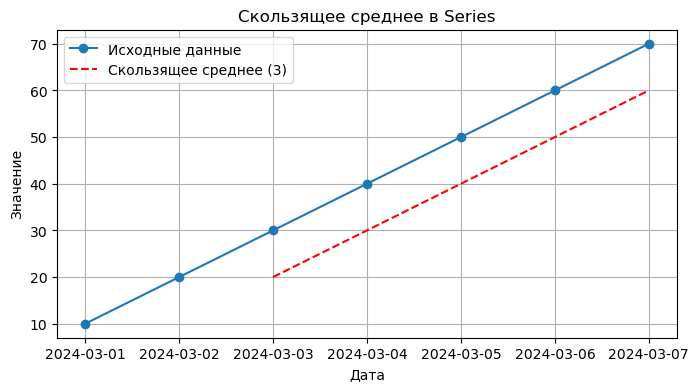

In [262]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(s, label="Исходные данные", marker="o")
plt.plot(s.rolling(window=3).mean(), label="Скользящее среднее (3)", linestyle="--", color="red")

plt.xlabel("Дата")
plt.ylabel("Значение")
plt.title("Скользящее среднее в Series")
plt.legend()
plt.grid()

plt.show()

## Процентный прирост

In [265]:
s = pd.Series([100, 110, 120, 90, 150])
print(s.pct_change())

0         NaN
1    0.100000
2    0.090909
3   -0.250000
4    0.666667
dtype: float64


In [267]:
print(s.pct_change() * 100)

0          NaN
1    10.000000
2     9.090909
3   -25.000000
4    66.666667
dtype: float64


In [269]:
print(s.pct_change(periods=2) * 100)

0          NaN
1          NaN
2    20.000000
3   -18.181818
4    25.000000
dtype: float64


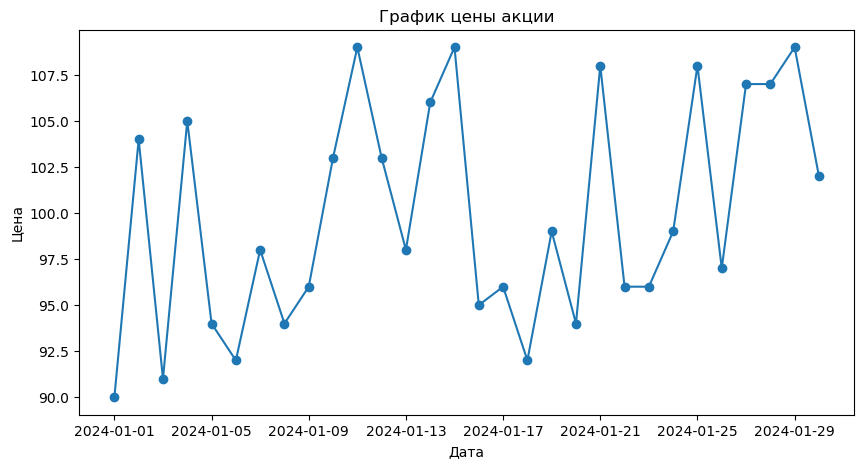

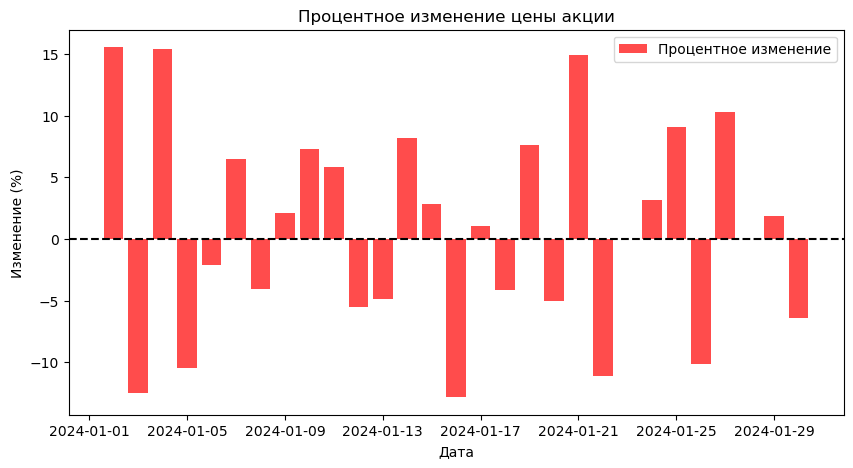

In [271]:
dates = pd.date_range(start="2024-01-01", periods=30, freq="D")
prices = pd.Series(np.random.randint(90, 110, size=30), index=dates)
returns = prices.pct_change() * 100

plt.figure(figsize=(10, 5))
plt.plot(prices, label="Цена акции", marker="o")
plt.ylabel("Цена")
plt.xlabel("Дата")
plt.title("График цены акции")

plt.figure(figsize=(10, 5))
plt.bar(returns.index, returns, color="red", alpha=0.7, label="Процентное изменение")
plt.axhline(0, color="black", linestyle="--")
plt.ylabel("Изменение (%)")
plt.xlabel("Дата")
plt.title("Процентное изменение цены акции")
plt.legend()

plt.show()

# Создание Series на основе данных из внешних файлов

## Загрузка данных из CSV-файла

In [280]:
df = pd.read_csv("products.csv")
s = df["quantity"]
print(s)

0     150
1     200
2     180
3      90
4     100
5      60
6      50
7     120
8     110
9     140
10    300
11    250
12     40
13     30
14    130
15    120
16    150
17    400
18     80
19     70
Name: quantity, dtype: int64


## Загрузка данных из Excel-файла

In [284]:
df = pd.read_excel("products.xlsx", sheet_name="Sheet1")
s = df["price"]
print(s)

0     0.50
1     0.30
2     0.60
3     1.20
4     1.00
5     2.50
6     3.00
7     0.80
8     0.70
9     0.40
10    0.25
11    0.35
12    5.00
13    7.50
14    1.10
15    1.30
16    0.90
17    0.20
18    2.00
19    3.50
Name: price, dtype: float64


## Чтение данных из файла с указанием индекса

In [287]:
s = pd.read_csv("products.csv", index_col="product_name")["quantity"]
print(s)

product_name
Apple       150
Banana      200
Orange      180
Milk         90
Bread       100
Butter       60
Cheese       50
Tomato      120
Cucumber    110
Carrot      140
Potato      300
Onion       250
Chicken      40
Beef         30
Rice        130
Pasta       120
Sugar       150
Salt        400
Tea          80
Coffee       70
Name: quantity, dtype: int64
